In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

df = pd.read_csv("survey_results_public.csv")
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [36]:
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedComp"]]
df = df.rename({"ConvertedComp": "Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN


In [37]:
# Display the first few rows of the dataframe
print("First few rows of the dataframe:")
print(df.head())

column_names = df.columns
print("Column names:", column_names)

# Display information about the dataframe, including data types and null values
print("\nInformation about the dataframe:")
print(df.info())

# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(df.describe())

print("\nMissing values in the dataframe:")
print(df.isnull().sum())



First few rows of the dataframe:
              Country                                          EdLevel  \
0             Germany  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
1      United Kingdom     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2  Russian Federation                                              NaN   
3             Albania  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
4       United States     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

  YearsCodePro                                         Employment  Salary  
0           27  Independent contractor, freelancer, or self-em...     NaN  
1            4                                 Employed full-time     NaN  
2          NaN                                                NaN     NaN  
3            4                                                NaN     NaN  
4            8                                 Employed full-time     NaN  
Column names: Index(['Country', 'EdLevel', 'YearsCodePro', 'Employ

In [38]:
# Dropping rows with any missing values
df.dropna(inplace=True)

# Check for missing values after dropping
print("Missing values in the dataframe:")
print(df.isnull().sum())


Missing values in the dataframe:
Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64


In [39]:
# Filter the dataframe to keep only rows where Employment is "Employed full-time" and drop the "Employment" column
df = df.loc[df["Employment"] == "Employed full-time"].drop("Employment", axis=1)

# Display information about the dataframe
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 30019 entries, 7 to 64154
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       30019 non-null  object 
 1   EdLevel       30019 non-null  object 
 2   YearsCodePro  30019 non-null  object 
 3   Salary        30019 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.1+ MB
None


In [40]:
# Compute the count of unique values in the "Country" column
country_counts = df['Country'].value_counts()

# Print the result
print("Country counts:")
print(country_counts)


Country counts:
Country
United States     7569
India             2425
United Kingdom    2287
Germany           1903
Canada            1178
                  ... 
Benin                1
Fiji                 1
San Marino           1
Guinea               1
Andorra              1
Name: count, Length: 154, dtype: int64


In [41]:
# Create a mapping of country names to either the country name itself or 'Other'
country_map = {cat: cat if count >= 400 else 'Other' for cat, count in df['Country'].value_counts().items()}

# Apply the mapping to the "Country" column of the dataframe
df['Country'] = df['Country'].map(country_map)

# Display the count of each category in the "Country" column
print(df['Country'].value_counts())


Country
Other                 8549
United States         7569
India                 2425
United Kingdom        2287
Germany               1903
Canada                1178
Brazil                 991
France                 972
Spain                  670
Australia              659
Netherlands            654
Poland                 566
Italy                  560
Russian Federation     522
Sweden                 514
Name: count, dtype: int64


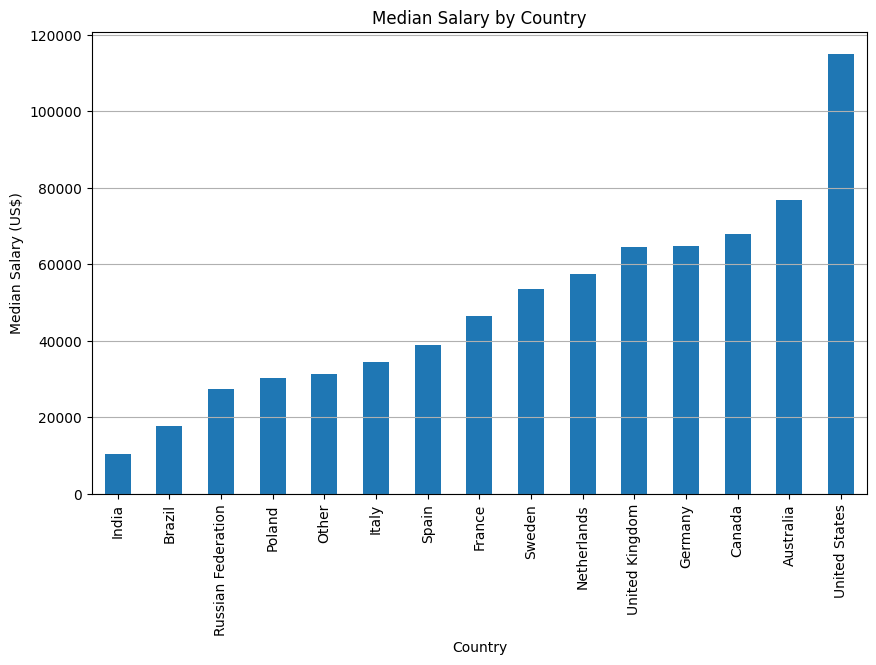

In [42]:
def plot_salary_distribution(df):
    plt.figure(figsize=(10, 6))
    df.groupby('Country')['Salary'].median().sort_values().plot(kind='bar')
    plt.title('Median Salary by Country')
    plt.xlabel('Country')
    plt.ylabel('Median Salary (US$)')
    plt.xticks(rotation=90)
    plt.grid(axis='y')
    plt.show()

# Call the function to plot median salary distribution by country
plot_salary_distribution(df)


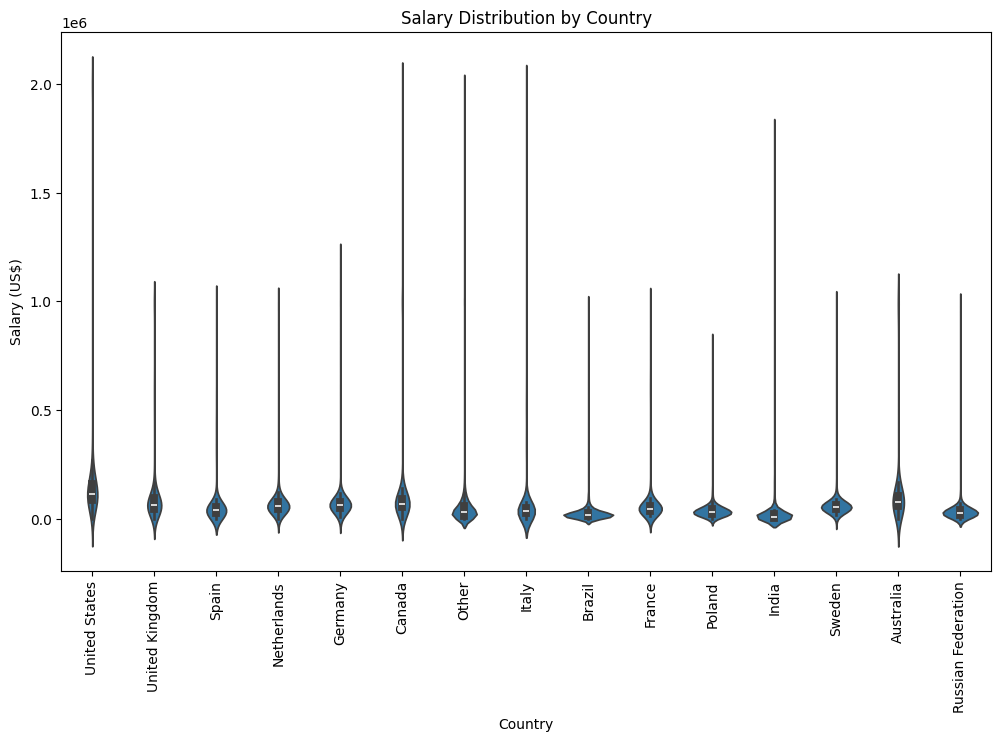

In [43]:
def plot_salary_violin(df):
    plt.figure(figsize=(12, 7))
    sns.violinplot(x='Country', y='Salary', data=df)
    plt.title('Salary Distribution by Country')
    plt.xlabel('Country')
    plt.ylabel('Salary (US$)')
    plt.xticks(rotation=90)
    plt.show()

# Call the function to plot salary distributions by country using violin plot
plot_salary_violin(df)


In [44]:
# Define new upper and lower salary limits
new_lower_salary_limit = 20000
new_upper_salary_limit = 200000

# Filter the dataframe based on the new salary limits and country filter
df = df[(df["Salary"] >= new_lower_salary_limit) & (df["Salary"] <= new_upper_salary_limit) & (df['Country'] != 'Other')]

# Display the first few rows of the filtered dataframe
print(df.head())


           Country                                            EdLevel  \
7    United States       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
9   United Kingdom    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
10  United Kingdom       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
12     Netherlands  Secondary school (e.g. American high school, G...   
13   United States                Associate degree (A.A., A.S., etc.)   

   YearsCodePro    Salary  
7            13  116000.0  
9             4   32315.0  
10            2   40070.0  
12           20   38916.0  
13            1   66000.0  


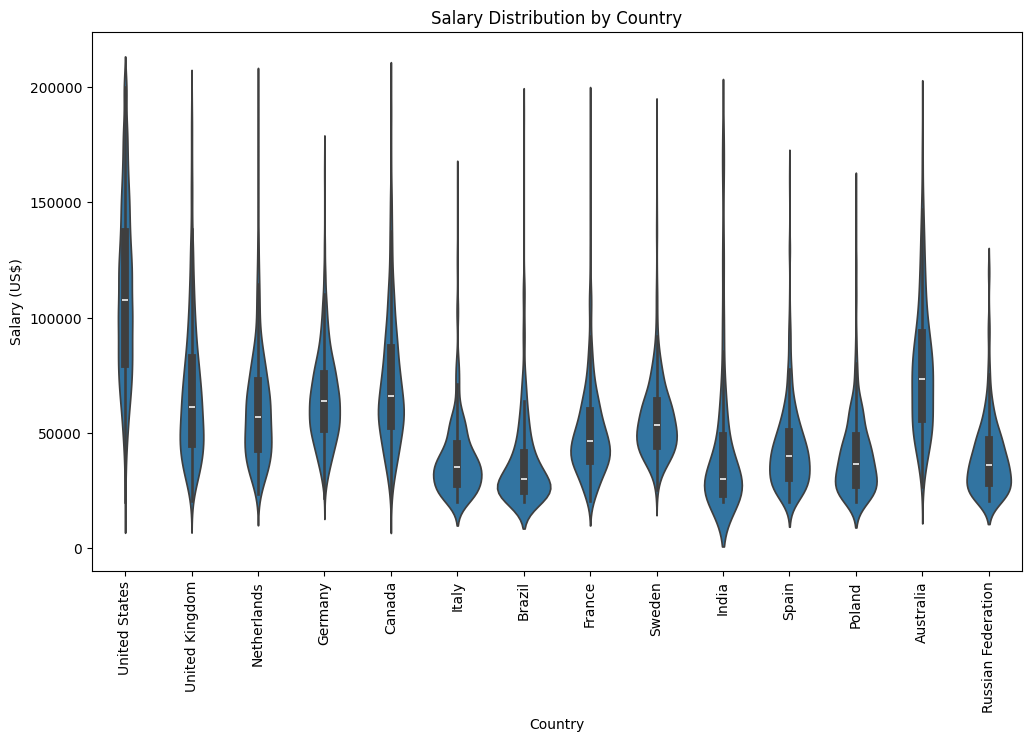

In [45]:
def plot_salary_violin(df):
    plt.figure(figsize=(12, 7))
    sns.violinplot(x='Country', y='Salary', data=df)
    plt.title('Salary Distribution by Country')
    plt.xlabel('Country')
    plt.ylabel('Salary (US$)')
    plt.xticks(rotation=90)
    plt.show()

# Call the function to plot salary distributions by country using violin plot
plot_salary_violin(df)


In [46]:
df["YearsCodePro"].unique()
def convert_experience_to_numeric(x):
    experience_map = {'More than 50 years': 50, 'Less than 1 year': 0.5}
    return experience_map.get(x, x)  # Return x if it's not in the map

df['YearsCodePro'] = df['YearsCodePro'].apply(convert_experience_to_numeric)


In [47]:
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [48]:
def clear_education(eduLevel):
    if 'Professional degree' in eduLevel or 'Other doctoral' in eduLevel:
        return 'Post grad'
    if 'Master’s degree' in eduLevel:
        return 'Master’s degree'
    if 'Bachelor’s degree' in eduLevel:
        return 'Bachelor’s degree'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clear_education)

In [49]:
df["EdLevel"].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [50]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder 
LableEducation = LabelEncoder()

# Fit and transform the "EdLevel" column
df['EdLevel'] = LableEducation.fit_transform(df['EdLevel'])

# unique numerical labels
print(df["EdLevel"].unique())


[0 2 1 3]


In [51]:
LableCountry = LabelEncoder()
df['Country'] = LableCountry.fit_transform(df['Country'])
df["Country"].unique()

array([13, 12,  7,  4,  2,  6,  1,  3, 11,  5, 10,  8,  0,  9])

In [52]:
# Define features and target variable with different variable names
features = df.drop("Salary", axis=1)
target = df["Salary"]


In [53]:
from sklearn.linear_model import LinearRegression

# Instantiate a LinearRegression model
regressor = LinearRegression()

# Fit the model to the training data
regressor.fit(features, target.values)


LinearRegression()

In [54]:
y_pred = regressor.predict(features)

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate the Root Mean Squared Error (RMSE)
error = np.sqrt(mean_squared_error(target, y_pred))


In [56]:
error

34793.31033358432

In [57]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate a DecisionTreeRegressor model
tree_regressor = DecisionTreeRegressor(random_state=0)

# Fit the model to the training data
tree_regressor.fit(features, target.values)


DecisionTreeRegressor(random_state=0)

In [58]:
y_pred = tree_regressor.predict(features)

In [59]:
# Calculate the Root Mean Squared Error (RMSE)
error = np.sqrt(mean_squared_error(target, y_pred))

# Print the RMSE with formatting
print("${:,.02f}".format(error))


$25,962.75


In [60]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
max_depth = [None, 2, 4, 6, 8, 10, 12]
parameters = {"max_depth": max_depth}

# Instantiate a DecisionTreeRegressor model
regressor = DecisionTreeRegressor(random_state=0)

# Perform Grid Search Cross Validation
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(features, target.values)


GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [61]:
# Get the best estimator from GridSearchCV
best_regressor = gs.best_estimator_

# Fit the best estimator to the training data
best_regressor.fit(features, target.values)

# Predict target variable using the best estimator
y_pred = best_regressor.predict(features)

# Calculate the Root Mean Squared Error (RMSE)
error = np.sqrt(mean_squared_error(target, y_pred))

# Print the RMSE with formatting
print("${:,.02f}".format(error))


$26,941.89


In [62]:
features

,Country,EdLevel,YearsCodePro
7,13,0,13
9,12,2,4
10,12,0,2
12,7,1,20
13,13,1,1
...,...,...,...
64101,9,1,10
64116,13,0,6
64122,13,1,4
64127,13,3,12


In [63]:
# country, edlevel, yearscode
features = np.array([["United States", 'Master’s degree', 15 ]])
features

array([['United States', 'Master’s degree', '15']], dtype='<U15')

In [64]:
# Transform categorical features using LabelEncoder LableCountry
features[:, 0] = LableCountry.transform(features[:, 0])
features[:, 1] = LableEducation.transform(features[:, 1])

# Convert all elements of features to float
features = features.astype(float)

# Print the modified array
print(features)


[[13.  2. 15.]]


In [65]:
y_pred = best_regressor.predict(features)
y_pred

C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([138178.81967213])

In [66]:
# Define the data dictionary
data = {"model": best_regressor, "LableCountry": LableCountry, "LableEducation": LableEducation}

# Save the data dictionary to a file using pickle
with open('mlModel.pkl', 'wb') as file:
    pickle.dump(data, file)

In [67]:
# Load the data dictionary from the file using pickle
with open('mlModel.pkl', 'rb') as file:
    data = pickle.load(file)

# Retrieve the model and LabelEncoder objects from the data dictionary
regressor_loaded = data["model"]
label_country = data["LableCountry"]
label_education = data["LableEducation"]

In [68]:
y_pred = regressor_loaded.predict(features)
y_pred

C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([138178.81967213])